In [1027]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
%matplotlib inline

In [1028]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

# 1. 데이터 불러오기

In [1029]:
# 상반기 주유소 판매 데이터 불러오기

first = pd.read_csv('../data/2019년 상반기 주유소 판매가격.csv', encoding='cp949')
first

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0
...,...,...,...,...,...,...,...,...,...,...,...
90585,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20190626,GS칼텍스,셀프,0,1529,1389,0
90586,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20190627,GS칼텍스,셀프,0,1529,1389,0
90587,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20190628,GS칼텍스,셀프,0,1529,1389,0
90588,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20190629,GS칼텍스,셀프,0,1529,1389,0


In [1030]:
# 하반기 주유소 판매 데이터 불러오기
second = pd.read_csv('../data/2019년 하반기 주유소 판매가격.csv', encoding='cp949')
second

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190701,SK에너지,셀프,1777,1577,1477,0
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190702,SK에너지,셀프,1777,1577,1477,0
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190703,SK에너지,셀프,1777,1577,1477,0
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190704,SK에너지,셀프,1777,1577,1477,0
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190705,SK에너지,셀프,1777,1577,1477,0
...,...,...,...,...,...,...,...,...,...,...,...
91119,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191227,GS칼텍스,셀프,0,1540,1389,1100
91120,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191228,GS칼텍스,셀프,0,1540,1389,1100
91121,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191229,GS칼텍스,셀프,0,1540,1389,1100
91122,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191230,GS칼텍스,셀프,0,1540,1389,1100


In [1031]:
# 상반기 판매가격 데이터 프레임 결측치 DataFrame조회
first.isnull()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
90585,False,False,False,False,False,False,False,False,False,False,False
90586,False,False,False,False,False,False,False,False,False,False,False
90587,False,False,False,False,False,False,False,False,False,False,False
90588,False,False,False,False,False,False,False,False,False,False,False


In [1032]:
# 상반기 판매가격 데이터 프레임 결측치 합 조회
first.isnull().sum()

번호       0
지역       0
상호       0
주소       0
기간       0
상표       0
셀프여부     0
고급휘발유    0
휘발유      0
경유       0
실내등유     0
dtype: int64

In [1033]:
# 하반기 판매가격 데이터 프레임 결측치 DataFrame조회
second.isnull()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
91119,False,False,False,False,False,False,False,False,False,False,False
91120,False,False,False,False,False,False,False,False,False,False,False
91121,False,False,False,False,False,False,False,False,False,False,False
91122,False,False,False,False,False,False,False,False,False,False,False


In [1034]:
# 하반기 판매가격 데이터 프레임 결측치 합 조회
second.isnull().sum()

번호       0
지역       0
상호       0
주소       0
기간       0
상표       0
셀프여부     0
고급휘발유    0
휘발유      0
경유       0
실내등유     0
dtype: int64

# 2. 데이터 결합

In [1035]:
# 상반기와 하반기 데이터를 상하로 결합
df = pd.concat([first,second],keys=['상반기','하반기'], ignore_index=True) # ignore_index=True : 인덱스 초기화하고 순서별로
df

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0
...,...,...,...,...,...,...,...,...,...,...,...
181709,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191227,GS칼텍스,셀프,0,1540,1389,1100
181710,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191228,GS칼텍스,셀프,0,1540,1389,1100
181711,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191229,GS칼텍스,셀프,0,1540,1389,1100
181712,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191230,GS칼텍스,셀프,0,1540,1389,1100


# 3. 데이터 가공 및 분석

In [1036]:
# 데이터 프레임 정보 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181714 entries, 0 to 181713
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   번호      181714 non-null  object
 1   지역      181714 non-null  object
 2   상호      181714 non-null  object
 3   주소      181714 non-null  object
 4   기간      181714 non-null  int64 
 5   상표      181714 non-null  object
 6   셀프여부    181714 non-null  object
 7   고급휘발유   181714 non-null  int64 
 8   휘발유     181714 non-null  int64 
 9   경유      181714 non-null  int64 
 10  실내등유    181714 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 15.3+ MB


In [1037]:
# 상표 컬럼의 고유값 조회
df['상표'].unique()

array(['SK에너지', 'GS칼텍스', 'S-OIL', '현대오일뱅크', '알뜰주유소', 'NH-OIL', '알뜰(ex)',
       '자가상표'], dtype=object)

In [1038]:
# 지역 컬럼의 고유값 조회
df['지역'].unique()

array(['서울 강남구', '서울 강동구', '서울 강북구', '서울 강서구', '서울 관악구', '서울 광진구',
       '서울 구로구', '서울 금천구', '서울 노원구', '서울 도봉구', '서울 동대문구', '서울 동작구',
       '서울 마포구', '서울 서대문구', '서울 서초구', '서울 성동구', '서울 성북구', '서울 송파구',
       '서울 양천구', '서울 영등포구', '서울 용산구', '서울 은평구', '서울 종로구', '서울 중구',
       '서울 중랑구'], dtype=object)

In [1039]:
# 지역 컬럼의 값을 이용하여 시와 구를 분리
name_split = df['지역'].str.split(" ")
df['시'] = name_split.str.get(0)
df['구'] = name_split.str.get(1)
df

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0,서울,강남구
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0,서울,강남구
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0,서울,강남구
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0,서울,강남구
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0,서울,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181709,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191227,GS칼텍스,셀프,0,1540,1389,1100,서울,중랑구
181710,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191228,GS칼텍스,셀프,0,1540,1389,1100,서울,중랑구
181711,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191229,GS칼텍스,셀프,0,1540,1389,1100,서울,중랑구
181712,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191230,GS칼텍스,셀프,0,1540,1389,1100,서울,중랑구


In [1040]:
type(df)

pandas.core.frame.DataFrame

In [1041]:
# 시 컬럼의 서울을 서울특별시로 변환
df.loc[df['시']=='서울','시'] = '서울특별시'
df

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181709,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191227,GS칼텍스,셀프,0,1540,1389,1100,서울특별시,중랑구
181710,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191228,GS칼텍스,셀프,0,1540,1389,1100,서울특별시,중랑구
181711,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191229,GS칼텍스,셀프,0,1540,1389,1100,서울특별시,중랑구
181712,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191230,GS칼텍스,셀프,0,1540,1389,1100,서울특별시,중랑구


In [1042]:
# 기간 컬럼을 datetime 형식으로 변경
df['기간']= pd.to_datetime(df['기간'],format='%Y%m%d')
df

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-01,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-02,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-03,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-04,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-05,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181709,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,2019-12-27,GS칼텍스,셀프,0,1540,1389,1100,서울특별시,중랑구
181710,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,2019-12-28,GS칼텍스,셀프,0,1540,1389,1100,서울특별시,중랑구
181711,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,2019-12-29,GS칼텍스,셀프,0,1540,1389,1100,서울특별시,중랑구
181712,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,2019-12-30,GS칼텍스,셀프,0,1540,1389,1100,서울특별시,중랑구


In [1043]:
# 변경된 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181714 entries, 0 to 181713
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   번호      181714 non-null  object        
 1   지역      181714 non-null  object        
 2   상호      181714 non-null  object        
 3   주소      181714 non-null  object        
 4   기간      181714 non-null  datetime64[ns]
 5   상표      181714 non-null  object        
 6   셀프여부    181714 non-null  object        
 7   고급휘발유   181714 non-null  int64         
 8   휘발유     181714 non-null  int64         
 9   경유      181714 non-null  int64         
 10  실내등유    181714 non-null  int64         
 11  시       181714 non-null  object        
 12  구       181714 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 18.0+ MB


In [1044]:
# 기간 컬럼에서 dt 타입을 이용하여 년, 월, 일, 요일 컬럼 생성
# (참고) https://m.blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221603462366&proxyReferer=https:%2F%2Fwww.google.com%2F 
df['년'] = df['기간'].dt.year
df['월'] = df['기간'].dt.month
df['일'] = df['기간'].dt.day
df['요일'] = df['기간'].dt.day_name()
df

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구,년,월,일,요일
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-01,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,1,Tuesday
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-02,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,2,Wednesday
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-03,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,3,Thursday
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-04,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,4,Friday
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-05,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,5,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181709,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,2019-12-27,GS칼텍스,셀프,0,1540,1389,1100,서울특별시,중랑구,2019,12,27,Friday
181710,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,2019-12-28,GS칼텍스,셀프,0,1540,1389,1100,서울특별시,중랑구,2019,12,28,Saturday
181711,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,2019-12-29,GS칼텍스,셀프,0,1540,1389,1100,서울특별시,중랑구,2019,12,29,Sunday
181712,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,2019-12-30,GS칼텍스,셀프,0,1540,1389,1100,서울특별시,중랑구,2019,12,30,Monday


In [1045]:
# 휘발유 가격이 비싼 5개 판매가격을 출력하세요.
df.sort_values(by=['휘발유'], ascending=False).head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구,년,월,일,요일
177210,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-24,SK에너지,일반,2649,2356,2196,0,서울특별시,중구,2019,9,24,Tuesday
177216,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-30,SK에너지,일반,2699,2356,2196,0,서울특별시,중구,2019,9,30,Monday
177217,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-10-01,SK에너지,일반,2699,2356,2196,0,서울특별시,중구,2019,10,1,Tuesday
177211,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-25,SK에너지,일반,2649,2356,2196,0,서울특별시,중구,2019,9,25,Wednesday
177212,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-26,SK에너지,일반,2699,2356,2196,0,서울특별시,중구,2019,9,26,Thursday


In [1046]:
# 휘발유 가격이 저렴한 5개 판매가격을 출력하세요. (단 휘발유가 0원인 데이터는 제외)
df.sort_values(by=['휘발유']).loc[df['휘발유']>0].head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구,년,월,일,요일
13148,A0033328,서울 강서구,KH에너지(주)직영 KH외발산주유소,서울 강서구 방화대로 30,2019-02-07,SK에너지,셀프,1788,1255,1155,0,서울특별시,강서구,2019,2,7,Thursday
82476,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-02-01,SK에너지,일반,0,1260,1160,0,서울특별시,은평구,2019,2,1,Friday
82475,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-01-31,SK에너지,일반,0,1260,1160,0,서울특별시,은평구,2019,1,31,Thursday
82474,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-01-30,SK에너지,일반,0,1260,1160,0,서울특별시,은평구,2019,1,30,Wednesday
83002,A0000690,서울 은평구,지에스칼텍스(주)수색뉴타운주유소,서울 은평구 수색로 350 (수색동),2019-01-30,GS칼텍스,셀프,0,1265,1165,0,서울특별시,은평구,2019,1,30,Wednesday


그래프 10개 
이런 해당 주제에 잘 부합한 그래프로 보여주기

1. 휘발유 가격이 어떻게 분포되어있나? - 지역별, 상표별 - lmplot

5. 셀프 주유소가 일반 주유소보다 싼가?


lmplot

상표별 평균 가격의 변화 - 휘발유, 경유, 고급 휘발유
y축:평균 가격, x축:날짜 그래프 개수: 상표 종류
hue : 셀프여부
-> 결론 : 휘발유, 경유, 고급 휘발유의 평균 가격이 가장 높은 상표와 낮은 상표
	휘발유, 경유, 고급 휘발유의 가격 변동률이 가장 높은 상표와 낮은 상표

지역별(구) 평균 가격의 변화 - 휘발유, 경유, 고급 휘발유
y축:평균 가격, x축:날짜 그래프 개수: 지역(구)
hue : 셀프여부
-> 결론 : 휘발유, 경유, 고급 휘발유의 평균 가격이 가장 높은 지역과 낮은 지역
	휘발유, 경유, 고급 휘발유의 가격 변동률이 가장 높은 지역와 낮은 지역


In [1047]:
import seaborn as sns

## 지역별, 상표별 휘발유,경유 가격이 어떻게 분포되어있는가?  

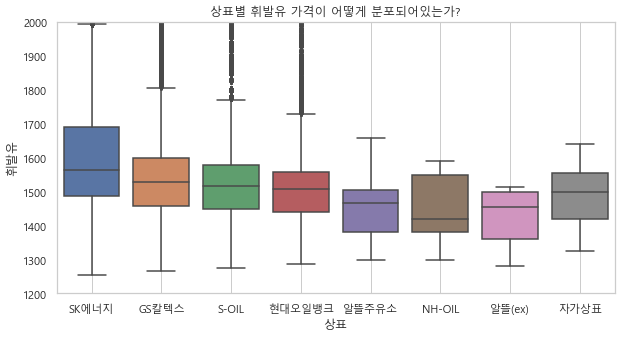

In [1048]:
plt.figure(figsize=(10,5))
sns.boxplot(x='상표', y='휘발유', data=df)
# plt.yticks(step=100)
plt.xlabel('상표')
plt.ylabel('휘발유')

plt.title('상표별 휘발유 가격이 어떻게 분포되어있는가?')
plt.grid()

# plt.axis([,,1000, 2000]) # 50,150 : x 영역 | 0, 0.03 : y 영역
plt.ylim([1200 ,2000])
plt.show()

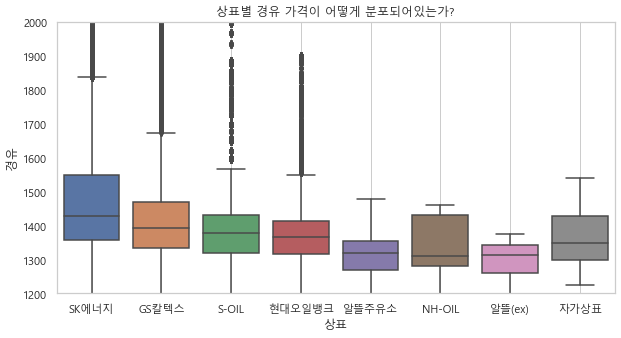

In [1049]:
plt.figure(figsize=(10,5))
sns.boxplot(x='상표', y='경유', data=df)

plt.xlabel('상표')
plt.ylabel('경유')

plt.title('상표별 경유 가격이 어떻게 분포되어있는가?')
plt.grid()

plt.ylim([1200 ,2000])
plt.show()

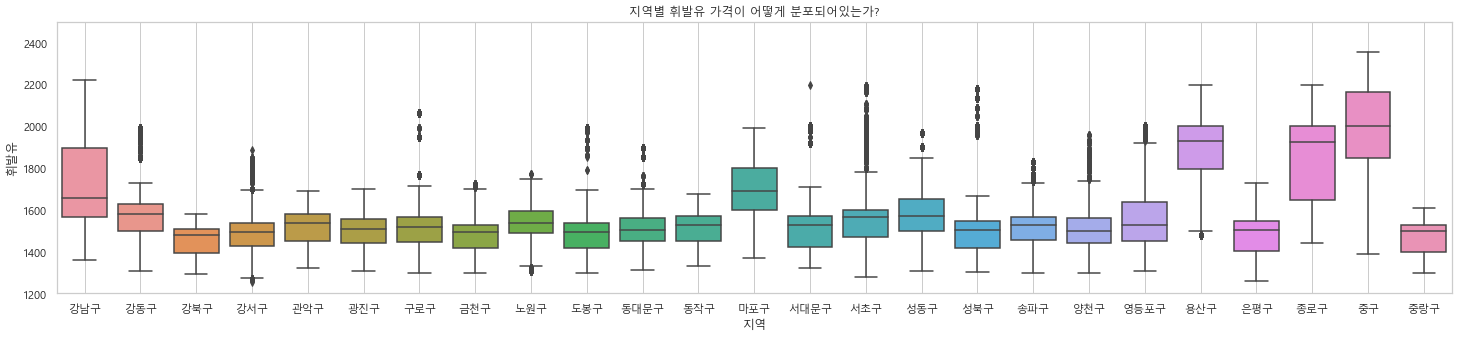

In [1050]:
plt.figure(figsize=(25,5))
sns.boxplot(x='구', y='휘발유', data=df)

plt.xlabel('지역')
plt.ylabel('휘발유')

plt.title('지역별 휘발유 가격이 어떻게 분포되어있는가?')
plt.grid()

plt.ylim([1200 ,2500])
plt.show()

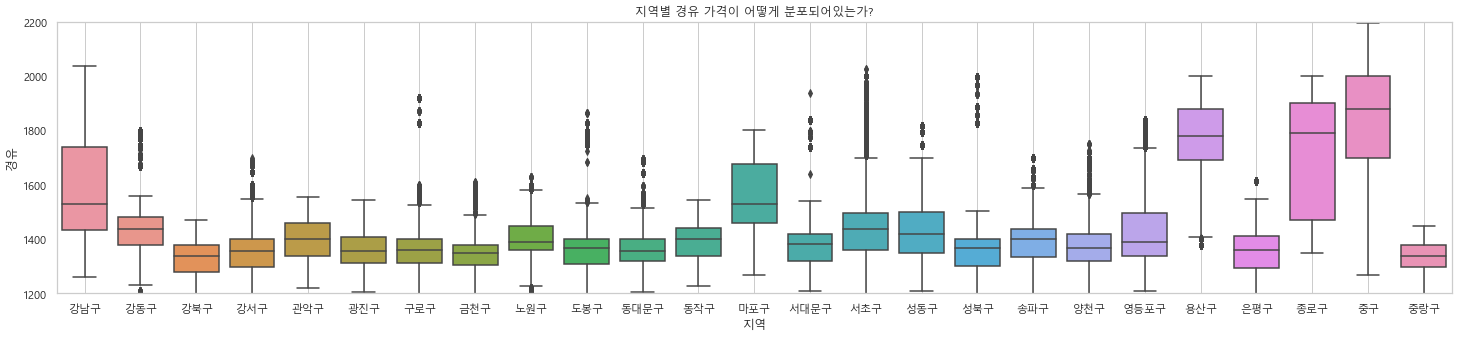

In [1051]:
plt.figure(figsize=(25,5))
sns.boxplot(x='구', y='경유', data=df)

plt.xlabel('지역')
plt.ylabel('경유')

plt.title('지역별 경유 가격이 어떻게 분포되어있는가?')
plt.grid()

plt.ylim([1200 ,2200])
plt.show()

## 고급휘발유, 휘발유, 경유 가격 비교

In [1052]:
df1 = pd.melt(df, "상표", value_vars=["고급휘발유","휘발유","경유"],value_name='price',var_name='species')
df1.rename(columns={'상표':'name'}, inplace=True)
df1

,name,species,price
0,SK에너지,고급휘발유,1673
1,SK에너지,고급휘발유,1673
2,SK에너지,고급휘발유,1673
3,SK에너지,고급휘발유,1673
4,SK에너지,고급휘발유,1673
...,...,...,...
545137,GS칼텍스,경유,1389
545138,GS칼텍스,경유,1389
545139,GS칼텍스,경유,1389
545140,GS칼텍스,경유,1389


<Figure size 1440x720 with 0 Axes>

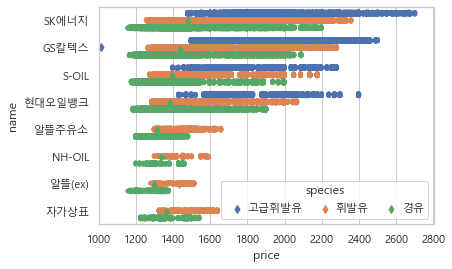

In [1053]:
plt.figure(figsize=(20,10))
# Initialize the figure
f, ax = plt.subplots()

# Show each observation with a scatterplot
sns.stripplot(x="price", y="name", hue="species",
              data=df1, dodge=True) # dodge는 복수의 데이터를 독립적인 막대 그래프

# Show the conditional means
sns.pointplot(x="price", y="name", hue="species",
              data=df1, dodge=True, join=False, 
              markers="d", scale=.75)

# 범례 만들기
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles[3:], labels[3:], title="species",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)

plt.xlim([1000 ,2800])
plt.show()

In [1054]:
handles
labels

['고급휘발유', '휘발유', '경유', '고급휘발유', '휘발유', '경유']

## 셀프 주유소가 일반 주유소보다 싼가?

In [1055]:
df1 = df[['상표','셀프여부','휘발유']]
df1.pivot_table(index='상표', values='휘발유', columns='셀프여부') #   aggfunc='mean'

셀프여부,셀프,일반
상표,,
GS칼텍스,1481.410074,1610.060123
NH-OIL,NaN,1449.088889
S-OIL,1481.437428,1579.451162
SK에너지,1504.853863,1690.377765
알뜰(ex),1431.347945,NaN
알뜰주유소,1434.726027,1455.372511
자가상표,1494.409449,1491.740351
현대오일뱅크,1483.546767,1534.254225


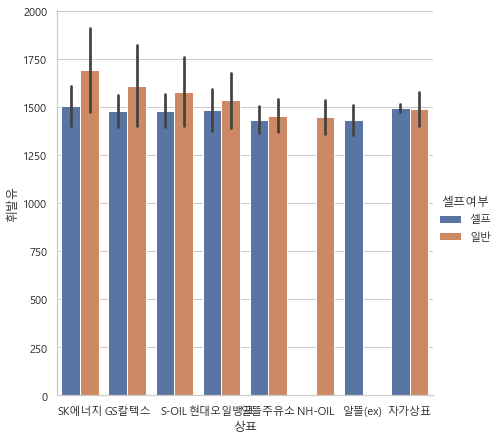

In [1056]:
sns.catplot( data=df1, kind="bar",
    x="상표", y="휘발유", hue="셀프여부",ci="sd",height=6)
plt.show()

<AxesSubplot:xlabel='상표', ylabel='휘발유'>

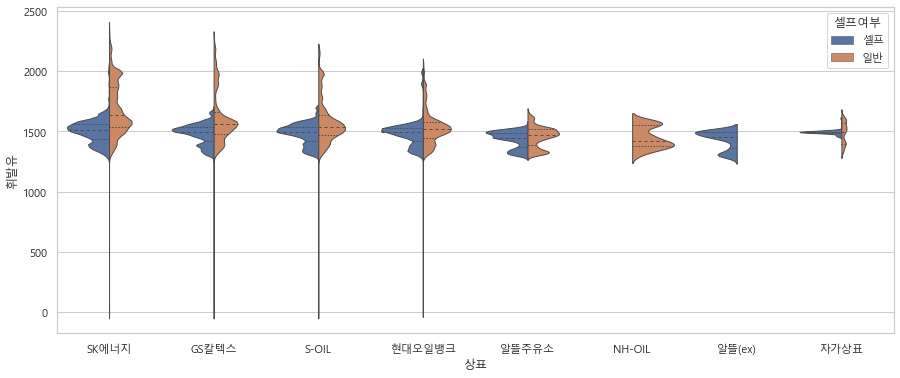

In [1057]:
plt.figure(figsize=(15,6))
sns.violinplot(data=df1, x="상표", y="휘발유", hue="셀프여부",
               split=True, inner="quart", linewidth=1)

## 상표별 평균 가격의 변화 - 휘발유, 경유, 고급 휘발유  
y축:평균 가격, x축:날짜 그래프 개수: 상표 종류  
hue : 셀프여부  
-> 결론 : 휘발유, 경유, 고급 휘발유의 평균 가격이 가장 높은 상표와 낮은 상표  
	휘발유, 경유, 고급 휘발유의 가격 변동률이 가장 높은 상표와 낮은 상표  

In [1058]:
# 사용할 데이터
df[['기간','상표','고급휘발유','휘발유','경유']].head()

,기간,상표,고급휘발유,휘발유,경유
0,2019-01-01,SK에너지,1673,1465,1365
1,2019-01-02,SK에너지,1673,1465,1365
2,2019-01-03,SK에너지,1673,1465,1365
3,2019-01-04,SK에너지,1673,1465,1365
4,2019-01-05,SK에너지,1673,1465,1365


In [1059]:
d1 = df.pivot_table(values='휘발유', columns=['상표'],index=['기간']) #   aggfunc='mean'
d1 = d1.rolling(7).mean()
d1.head()

상표,GS칼텍스,NH-OIL,S-OIL,SK에너지,알뜰(ex),알뜰주유소,자가상표,현대오일뱅크
기간,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1060]:
# 한글 깨짐 현상이 있어서 밑의 방식으로 해결
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

# # 한글폰트 설정 확인을 합니다.
# pd.Series([1, -1, 0, 5, -5]).plot(title="한글폰트")

<AxesSubplot:title={'center':'상표별 평균 휘발유 가격의 변화 '}, xlabel='기간', ylabel='휘발유'>

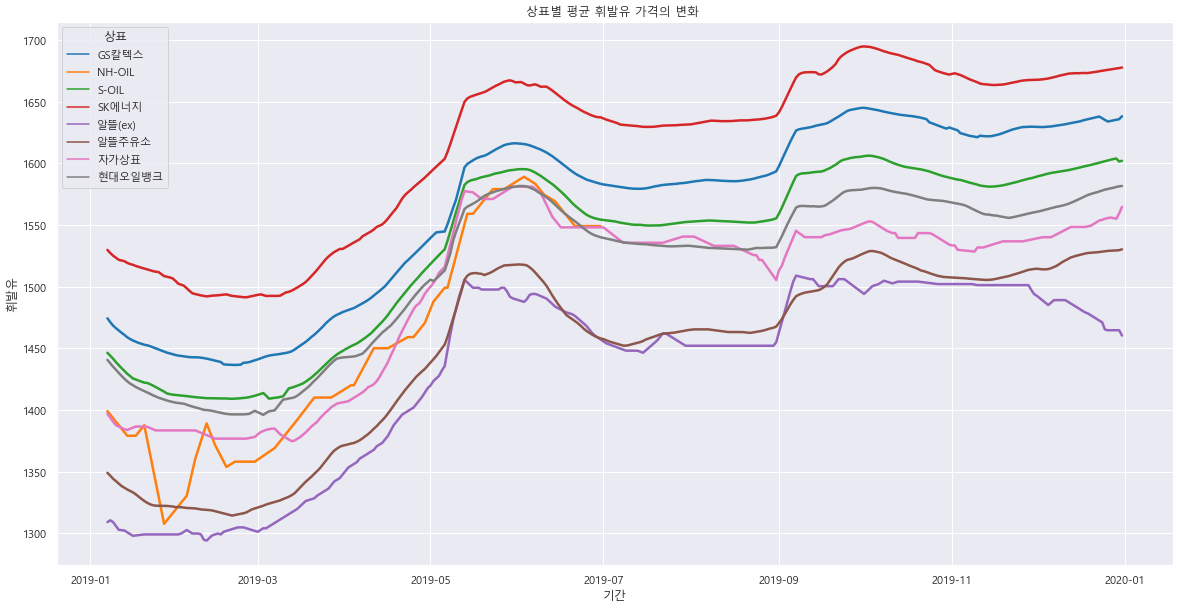

In [1061]:
# sns.set_style(style="whitegrid")

plt.figure(figsize=(20,10))
plt.xlabel('기간')
plt.ylabel('휘발유')

plt.title('상표별 평균 휘발유 가격의 변화 ')
sns.lineplot(data=d1,palette="tab10", linewidth=2.5,dashes=False)

<AxesSubplot:xlabel='기간'>

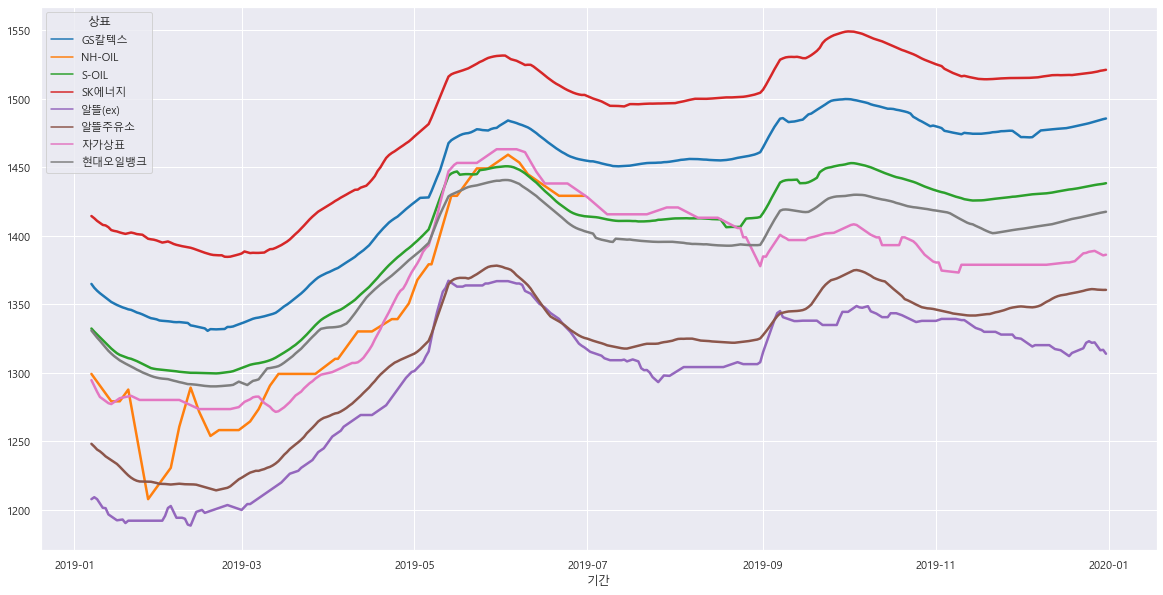

In [1062]:
# sns.set_style(style="whitegrid")
d2 = df.pivot_table(values='경유', columns=['상표'], index=['기간'])
d2 = d2.rolling(7).mean()

plt.figure(figsize=(20,10))
# sns.lineplot(data=d1,x='기간',y='상표', palette="tab10", linewidth=2.5)
sns.lineplot(data=d2,palette="tab10", linewidth=2.5,dashes=False)

<AxesSubplot:xlabel='기간'>

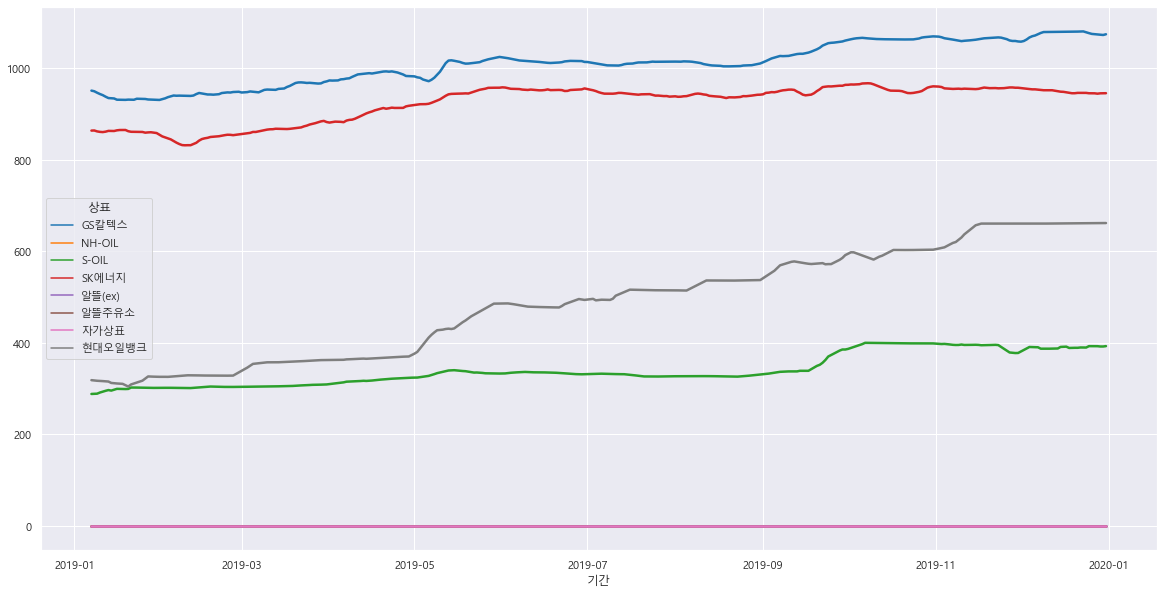

In [1063]:
d3 = df.pivot_table(values='고급휘발유', index=['기간'], columns=['상표'])
d3 = d3.rolling(7).mean()

# sns.set_style(style="whitegrid")

plt.figure(figsize=(20,10))
# sns.lineplot(data=d1,x='기간',y='상표', palette="tab10", linewidth=2.5)
sns.lineplot(data=d3,palette="tab10", linewidth=2.5,dashes=False)

## 지역별(구) 평균 가격의 변화 - 휘발유, 경유, 고급 휘발유  
y축:평균 가격, x축:날짜 그래프 개수: 지역(구)  
hue : 셀프여부  
-> 결론 : 휘발유, 경유, 고급 휘발유의 평균 가격이 가장 높은 지역과 낮은 지역  
	휘발유, 경유, 고급 휘발유의 가격 변동률이 가장 높은 지역와 낮은 지역  

In [1064]:
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구,년,월,일,요일
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-01,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,1,Tuesday
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-02,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,2,Wednesday
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-03,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,3,Thursday
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-04,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,4,Friday
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-05,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,5,Saturday


In [1065]:
# 사용할 데이터
df[['기간','구','고급휘발유','휘발유','경유']].head()

,기간,구,고급휘발유,휘발유,경유
0,2019-01-01,강남구,1673,1465,1365
1,2019-01-02,강남구,1673,1465,1365
2,2019-01-03,강남구,1673,1465,1365
3,2019-01-04,강남구,1673,1465,1365
4,2019-01-05,강남구,1673,1465,1365


In [1066]:
d1 = df.pivot_table(values='휘발유', columns=['구'],index=['기간']) #   aggfunc='mean'
d1.head()

구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
기간,,,,,,,,,,,,,,,,,,,,,
2019-01-01,1646.512195,1529.470588,1381.153846,1416.028571,1456.500000,1407.222222,1433.523810,1390.076923,1434.933333,1399.421053,...,1514.117647,1426.565217,1445.225806,1433.44,1508.09375,1800.466667,1389.764706,1772.888889,1853.666667,1387.5625
2019-01-02,1645.609756,1525.941176,1379.153846,1410.685714,1452.055556,1409.222222,1429.571429,1380.615385,1433.066667,1397.789474,...,1508.588235,1425.608696,1431.258065,1430.64,1505.09375,1794.466667,1384.941176,1766.222222,1848.833333,1383.8125
2019-01-03,1641.365854,1516.058824,1376.307692,1404.657143,1448.722222,1404.888889,1429.476190,1380.615385,1424.333333,1395.526316,...,1503.823529,1422.782609,1422.709677,1423.40,1499.93750,1787.133333,1379.647059,1764.000000,1843.833333,1379.5625
2019-01-04,1637.487805,1513.117647,1375.846154,1401.294118,1445.444444,1405.444444,1427.285714,1380.615385,1420.266667,1393.526316,...,1500.705882,1420.086957,1421.387097,1422.60,1496.12500,1787.133333,1375.470588,1764.000000,1844.583333,1377.0625
2019-01-05,1634.609756,1512.529412,1367.307692,1397.705882,1437.352941,1399.222222,1427.285714,1379.769231,1420.266667,1387.473684,...,1496.588235,1420.260870,1420.000000,1421.24,1498.68750,1780.266667,1374.000000,1764.000000,1844.583333,1378.5000


In [1067]:
# d2.rename(columns={"GS칼텍스": "A","NH-OIL": "B","S-OIL": "C","SK에너지": "D",
#                    "알뜰(ex)": "E","알뜰주유소": "F","자가상표": "G","현대오일뱅크": "H"}, inplace=True)
d1 = d1.rolling(7).mean()
d1

구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
기간,,,,,,,,,,,,,,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,1773.256410,1638.428571,1514.263736,1567.382990,1595.544643,1562.949580,1602.551020,1563.516484,1603.914286,1537.571429,...,1652.798319,1569.291925,1571.766234,1577.678681,1644.450893,1915.273469,1551.806723,1901.539683,2065.597403,1543.866071
2019-12-28,1773.538462,1638.875000,1514.813187,1568.681309,1595.633929,1563.378151,1603.136054,1563.846154,1604.657143,1538.444444,...,1653.033613,1570.062112,1572.138528,1577.931429,1644.584821,1918.546939,1552.504202,1901.269841,2065.129870,1544.508929
2019-12-29,1773.783883,1639.142857,1515.582418,1569.810924,1595.723214,1563.815126,1603.721088,1564.175824,1605.400000,1540.174603,...,1653.235294,1570.447205,1572.424242,1578.300220,1644.852679,1921.820408,1553.126050,1901.000000,2064.662338,1545.116071


In [1068]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2019-01-01 to 2019-12-31
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   강남구     359 non-null    float64
 1   강동구     359 non-null    float64
 2   강북구     359 non-null    float64
 3   강서구     359 non-null    float64
 4   관악구     359 non-null    float64
 5   광진구     359 non-null    float64
 6   구로구     359 non-null    float64
 7   금천구     359 non-null    float64
 8   노원구     359 non-null    float64
 9   도봉구     359 non-null    float64
 10  동대문구    359 non-null    float64
 11  동작구     359 non-null    float64
 12  마포구     359 non-null    float64
 13  서대문구    359 non-null    float64
 14  서초구     359 non-null    float64
 15  성동구     359 non-null    float64
 16  성북구     359 non-null    float64
 17  송파구     359 non-null    float64
 18  양천구     359 non-null    float64
 19  영등포구    359 non-null    float64
 20  용산구     359 non-null    float64
 21  은평구     359 non-null

<AxesSubplot:xlabel='기간'>

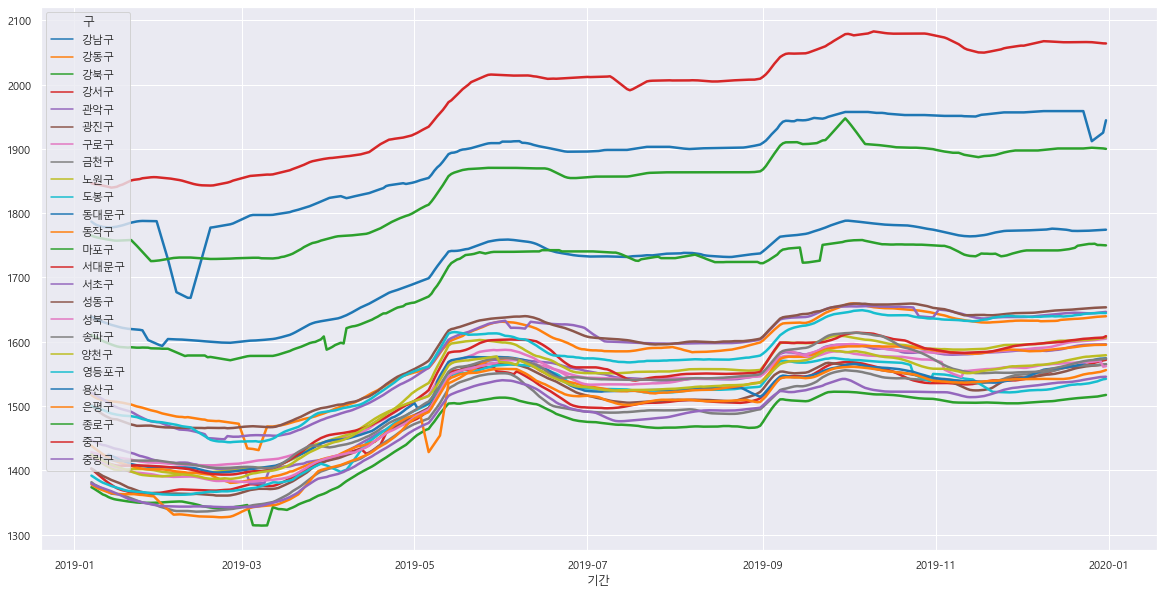

In [1069]:
# sns.set_style(style="whitegrid")

plt.figure(figsize=(20,10))
# sns.lineplot(data=d1,x='기간',y='상표', palette="tab10", linewidth=2.5)
sns.lineplot(data=d1, palette="tab10", linewidth=2.5,dashes=False)

In [1070]:
d2 = df.pivot_table(values='경유', columns=['구'],index=['기간']) #   aggfunc='mean'
d2.head()

구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
기간,,,,,,,,,,,,,,,,,,,,,
2019-01-01,1519.365854,1405.647059,1265.153846,1309.142857,1341.111111,1308.055556,1319.095238,1291.538462,1331.533333,1296.263158,...,1414.411765,1321.652174,1332.838710,1319.00,1398.56250,1680.666667,1280.588235,1642.888889,1743.333333,1288.3125
2019-01-02,1518.243902,1404.470588,1260.615385,1304.485714,1334.833333,1307.888889,1315.142857,1281.230769,1324.800000,1293.578947,...,1402.470588,1321.173913,1323.225806,1316.32,1395.56250,1674.000000,1275.529412,1636.222222,1733.916667,1286.4375
2019-01-03,1513.609756,1394.294118,1258.615385,1299.800000,1332.055556,1305.333333,1315.047619,1281.923077,1320.933333,1292.736842,...,1397.705882,1318.391304,1317.129032,1308.84,1390.56250,1666.000000,1270.470588,1634.000000,1730.333333,1282.5625
2019-01-04,1510.585366,1393.705882,1253.307692,1295.588235,1328.722222,1303.833333,1312.904762,1281.230769,1318.800000,1291.526316,...,1398.058824,1316.652174,1316.032258,1308.04,1390.09375,1666.000000,1266.294118,1634.000000,1729.166667,1283.8125
2019-01-05,1508.512195,1393.117647,1251.076923,1292.705882,1319.647059,1301.111111,1312.904762,1284.307692,1318.800000,1287.368421,...,1393.941176,1316.652174,1313.741935,1307.48,1390.09375,1661.466667,1264.823529,1634.000000,1730.250000,1280.6875


In [1071]:
# d2.rename(columns={"GS칼텍스": "A","NH-OIL": "B","S-OIL": "C","SK에너지": "D",
#                    "알뜰(ex)": "E","알뜰주유소": "F","자가상표": "G","현대오일뱅크": "H"}, inplace=True)
d2 = d2.rolling(7).mean()
d2

구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
기간,,,,,,,,,,,,,,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,1620.043956,1486.500000,1364.692308,1401.747772,1443.535714,1392.193277,1424.340136,1398.384615,1448.323810,1383.857143,...,1484.680672,1405.496894,1419.584416,1410.615604,1486.075893,1817.261224,1396.815126,1740.793651,1887.194805,1373.651786
2019-12-28,1621.117216,1487.214286,1365.131868,1402.600713,1443.446429,1392.277311,1424.884354,1398.384615,1448.895238,1384.063492,...,1484.957983,1406.055901,1419.991342,1410.687033,1486.299107,1820.484354,1397.176471,1741.000000,1887.000000,1374.535714
2019-12-29,1621.787546,1487.839286,1365.681319,1403.462185,1443.535714,1392.537815,1425.428571,1398.384615,1449.466667,1384.269841,...,1485.126050,1406.552795,1420.398268,1411.124615,1486.830357,1823.707483,1397.386555,1741.206349,1886.805195,1375.419643


In [1072]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2019-01-01 to 2019-12-31
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   강남구     359 non-null    float64
 1   강동구     359 non-null    float64
 2   강북구     359 non-null    float64
 3   강서구     359 non-null    float64
 4   관악구     359 non-null    float64
 5   광진구     359 non-null    float64
 6   구로구     359 non-null    float64
 7   금천구     359 non-null    float64
 8   노원구     359 non-null    float64
 9   도봉구     359 non-null    float64
 10  동대문구    359 non-null    float64
 11  동작구     359 non-null    float64
 12  마포구     359 non-null    float64
 13  서대문구    359 non-null    float64
 14  서초구     359 non-null    float64
 15  성동구     359 non-null    float64
 16  성북구     359 non-null    float64
 17  송파구     359 non-null    float64
 18  양천구     359 non-null    float64
 19  영등포구    359 non-null    float64
 20  용산구     359 non-null    float64
 21  은평구     359 non-null

<AxesSubplot:xlabel='기간'>

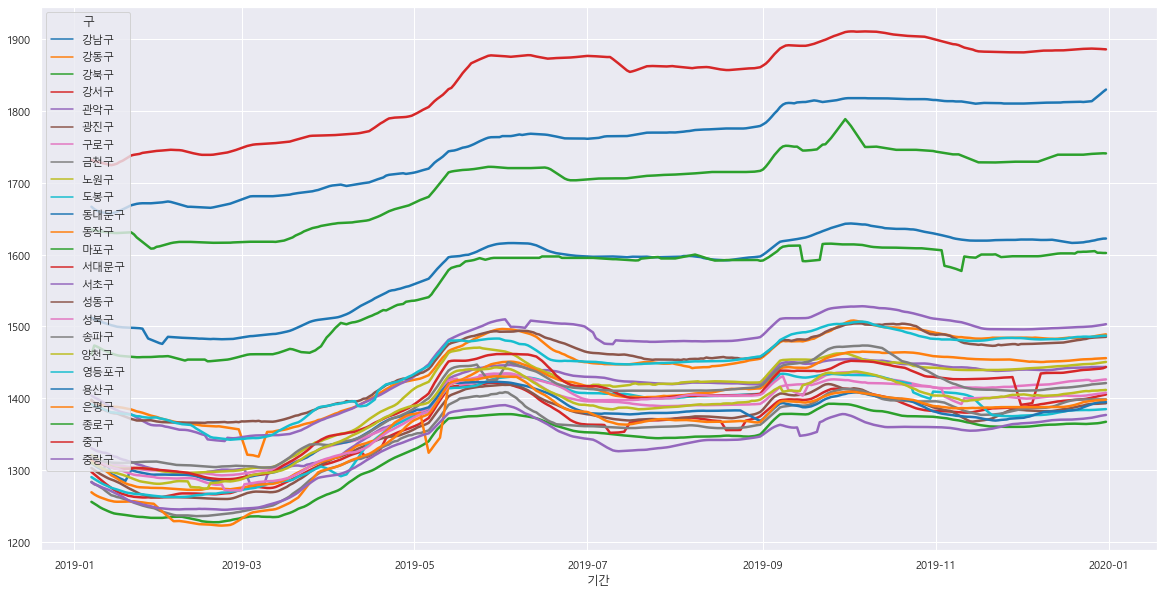

In [1073]:
# sns.set_style(style="whitegrid")

plt.figure(figsize=(20,10))
# sns.lineplot(data=d1,x='기간',y='상표', palette="tab10", linewidth=2.5)
sns.lineplot(data=d2,palette="tab10", linewidth=2.5,dashes=False)

In [1074]:
d3 = df.pivot_table(values='고급휘발유', columns=['구'],index=['기간']) #   aggfunc='mean'
d3.head()

구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
기간,,,,,,,,,,,,,,,,,,,,,
2019-01-01,1566.243902,744.823529,396.384615,487.942857,290.277778,460.611111,79.428571,120.461538,562.266667,363.105263,...,759.764706,462.391304,693.806452,559.48,299.9375,1929.600000,510.000000,1386.000000,1670.416667,214.125
2019-01-02,1564.609756,743.058824,396.384615,539.314286,289.722222,460.166667,79.428571,120.461538,555.400000,363.105263,...,756.823529,462.391304,692.161290,555.48,299.9375,1924.266667,508.823529,1383.777778,1662.750000,214.125
2019-01-03,1560.951220,735.823529,396.384615,533.028571,289.722222,459.555556,79.428571,120.461538,555.400000,362.736842,...,755.352941,462.391304,689.258065,554.68,298.9375,1922.266667,507.058824,1381.555556,1656.416667,214.125
2019-01-04,1557.317073,732.882353,394.846154,548.705882,289.722222,459.555556,79.428571,120.461538,555.400000,362.736842,...,755.352941,461.478261,689.258065,554.68,298.9375,1922.266667,505.470588,1381.555556,1658.916667,214.125
2019-01-05,1508.268293,735.823529,394.846154,547.294118,306.764706,459.555556,79.428571,120.461538,555.400000,362.736842,...,755.352941,461.478261,687.806452,554.68,298.9375,1918.533333,503.882353,1381.555556,1663.750000,214.125


In [1075]:
# d2.rename(columns={"GS칼텍스": "A","NH-OIL": "B","S-OIL": "C","SK에너지": "D",
#                    "알뜰(ex)": "E","알뜰주유소": "F","자가상표": "G","현대오일뱅크": "H"}, inplace=True)
d3 = d3.rolling(7).mean()
d3

구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
기간,,,,,,,,,,,,,,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,1683.780220,843.883929,559.692308,615.102368,458.3125,842.016807,247.52381,130.725275,592.980952,405.777778,...,803.000000,626.086957,795.255411,624.906813,533.866071,2172.028571,610.764706,1687.539683,1939.506494,230.750000
2019-12-28,1684.025641,844.062500,559.692308,615.375477,458.3125,842.100840,247.52381,130.835165,592.980952,405.777778,...,803.000000,625.440994,795.177489,625.071648,533.910714,2175.314286,610.932773,1687.063492,1939.220779,230.839286
2019-12-29,1684.271062,844.062500,559.692308,613.210084,458.3125,842.184874,247.52381,130.945055,592.980952,405.777778,...,803.000000,625.689441,795.350649,628.854066,533.955357,2178.600000,611.016807,1686.587302,1938.935065,230.928571


In [1076]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2019-01-01 to 2019-12-31
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   강남구     359 non-null    float64
 1   강동구     359 non-null    float64
 2   강북구     359 non-null    float64
 3   강서구     359 non-null    float64
 4   관악구     359 non-null    float64
 5   광진구     359 non-null    float64
 6   구로구     359 non-null    float64
 7   금천구     359 non-null    float64
 8   노원구     359 non-null    float64
 9   도봉구     359 non-null    float64
 10  동대문구    359 non-null    float64
 11  동작구     359 non-null    float64
 12  마포구     359 non-null    float64
 13  서대문구    359 non-null    float64
 14  서초구     359 non-null    float64
 15  성동구     359 non-null    float64
 16  성북구     359 non-null    float64
 17  송파구     359 non-null    float64
 18  양천구     359 non-null    float64
 19  영등포구    359 non-null    float64
 20  용산구     359 non-null    float64
 21  은평구     359 non-null

<AxesSubplot:xlabel='기간'>

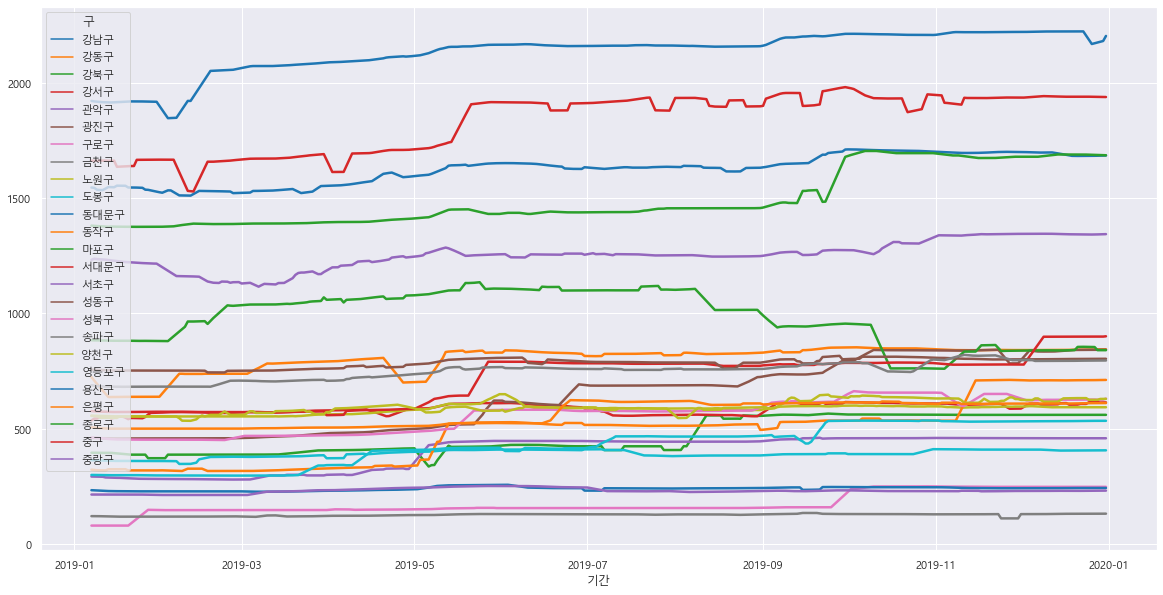

In [1077]:
# sns.set_style(style="whitegrid")

plt.figure(figsize=(20,10))
# sns.lineplot(data=d1,x='기간',y='상표', palette="tab10", linewidth=2.5)
sns.lineplot(data=d3,palette="tab10", linewidth=2.5,dashes=False)

## 요일별 휘발유 가격

In [1078]:
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구,년,월,일,요일
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-01,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,1,Tuesday
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-02,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,2,Wednesday
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-03,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,3,Thursday
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-04,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,4,Friday
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-05,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,5,Saturday


In [1079]:
days= df[['요일','휘발유']]
days.rename(columns={'요일':'day','휘발유':'gasoline'}, inplace = True)

C:\Users\wonseyoung\anaconda3\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


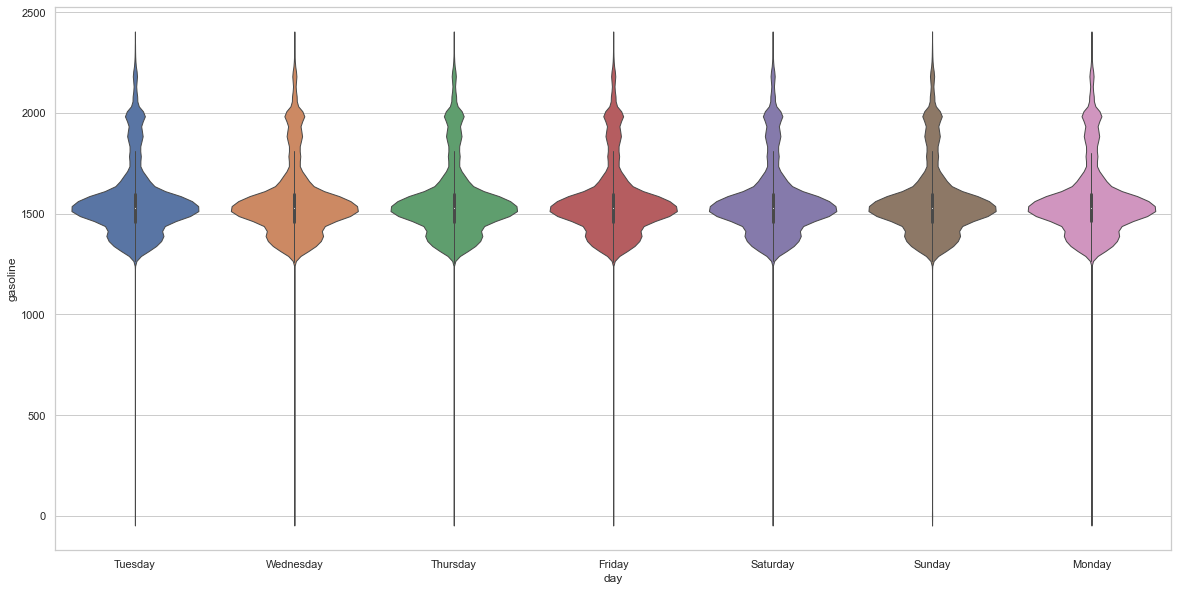

In [1080]:
plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")

# plt.xlabel('요일')
# plt.ylabel('휘발유')

# plt.title('요일별 휘발유 가격')

sns.violinplot(data=days, x="day", y="gasoline", linewidth=1)
plt.show()

## 결론

아쉬운 점 :중구난방, 데이터 분석 부족, 그래프 선택